In [1]:
from datetime import datetime
start  = datetime.now().minute

#### program start ####
import pandas as pd
import numpy as np
import itertools
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.exceptions import NotFittedError
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
#from imblearn.ensemble import BalanceCascade
from nltk.stem.snowball import SnowballStemmer
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import svm
from operator import itemgetter
from sklearn.metrics import classification_report
from sklearn import decomposition
from sklearn import ensemble
import xgboost,textblob,string
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.exceptions import NotFittedError
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import time
import os

### Read Data & Preprocessing ###

In [2]:
Train_Data = pd.read_csv("2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv")
Test_Data = pd.read_csv("2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv")

##### Dropping Target Column #####
Test_Data.drop(columns=['zeta_disease'],inplace=True)

##### Checking Data ####
print("printing the information of Train Data \n")
Train_Data.info()
print('\n')
print("printing the information of Test Data \n")
Test_Data.info()
print('\n')

##### Finding Missing Values ###
print("printing the count of missing values for Train_Data \n")
print(Train_Data.isna().sum())
print(Train_Data.dropna(inplace=True))
print('\n')
print("printing the count of missing values for Test_Data \n")
print(Test_Data.isna().sum())
print(Test_Data.dropna(inplace=True))
print('\n')

#### printing length of Data ###
print("printing lengths of Train_Data \n")
print(Train_Data.count())
print('\n')
print("printing lengths of Test_Data \n")
print(Test_Data.count())
print('\n')

#### Renaming column Names to upper for data normalization ####
Train_Data.columns = [column.upper() for column in Train_Data.columns]
Test_Data.columns = [column.upper() for column in Test_Data.columns]
print('\n')
print("printing Train_Data columns \n")
print(Train_Data.columns)
print('\n')
print("printing Test Data columns \n")
print(Test_Data.columns)

##### Dropping Duplicates ####
print("print length of Train Data before dropping duplicates \n")
print(len(Train_Data))
print("print length of Train Data after dropping duplicates \n")
Train_Data = Train_Data.drop_duplicates()
print("print length of Test Data before dropping duplicates \n")
print(len(Train_Data))
Test_Data = Test_Data.drop_duplicates()
print("print length of Test Data after dropping duplicates \n")
print(len(Test_Data))

printing the information of Train Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


printing the information of Test Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age               

In [3]:
from pycaret.classification import *
exp_clf101 = setup(data = Train_Data, target = 'ZETA_DISEASE', session_id=123)

,Description,Value
0,session_id,123
1,Target,ZETA_DISEASE
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(795, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7914,0.8508,0.5792,0.7331,0.6418,0.4982,0.5088,0.8730
lda,Linear Discriminant Analysis,0.7896,0.8457,0.5737,0.7315,0.6376,0.4932,0.5040,0.0220
ridge,Ridge Classifier,0.7878,0.0000,0.5681,0.7310,0.6335,0.4882,0.4998,0.0250
rf,Random Forest Classifier,0.7806,0.8499,0.5462,0.7270,0.6165,0.4678,0.4820,0.3580
catboost,CatBoost Classifier,0.7789,0.8573,0.5898,0.6948,0.6329,0.4767,0.4838,2.4230
et,Extra Trees Classifier,0.7717,0.8379,0.5292,0.7053,0.5994,0.4448,0.4571,0.3170
gbc,Gradient Boosting Classifier,0.7662,0.8416,0.5629,0.6749,0.6080,0.4443,0.4521,0.1120
xgboost,Extreme Gradient Boosting,0.7608,0.8279,0.5857,0.6502,0.6131,0.4414,0.4450,0.3560
lightgbm,Light Gradient Boosting Machine,0.7536,0.8268,0.5749,0.6401,0.6028,0.4255,0.4290,0.0520
ada,Ada Boost Classifier,0.7519,0.8187,0.5573,0.6396,0.5915,0.4154,0.4201,0.1010


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
Tuned_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7679,0.7675,0.6667,0.6316,0.6486,0.4755,0.4759
1,0.7321,0.8246,0.5000,0.6000,0.5455,0.3578,0.3608
2,0.8214,0.8991,0.5556,0.8333,0.6667,0.5513,0.5724
3,0.8214,0.8860,0.5556,0.8333,0.6667,0.5513,0.5724
4,0.6964,0.7602,0.4444,0.5333,0.4848,0.2722,0.2744
5,0.8750,0.9445,0.7368,0.8750,0.8000,0.7101,0.7156
6,0.8182,0.8889,0.7222,0.7222,0.7222,0.5871,0.5871
7,0.7818,0.8559,0.4444,0.8000,0.5714,0.4407,0.4749
8,0.8000,0.8153,0.5556,0.7692,0.6452,0.5109,0.5240
9,0.8000,0.8664,0.6111,0.7333,0.6667,0.5255,0.5299


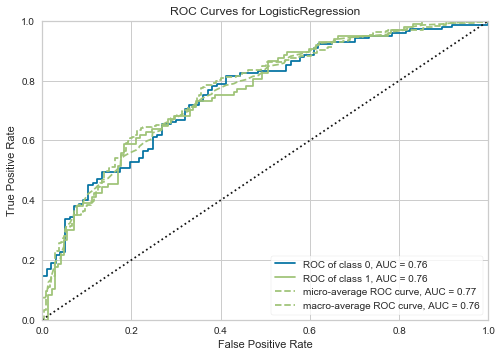

In [6]:
plot_model(Tuned_model, plot = 'auc')

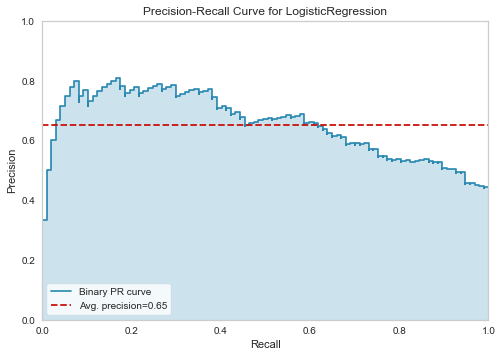

In [7]:
plot_model(Tuned_model, plot = 'pr')

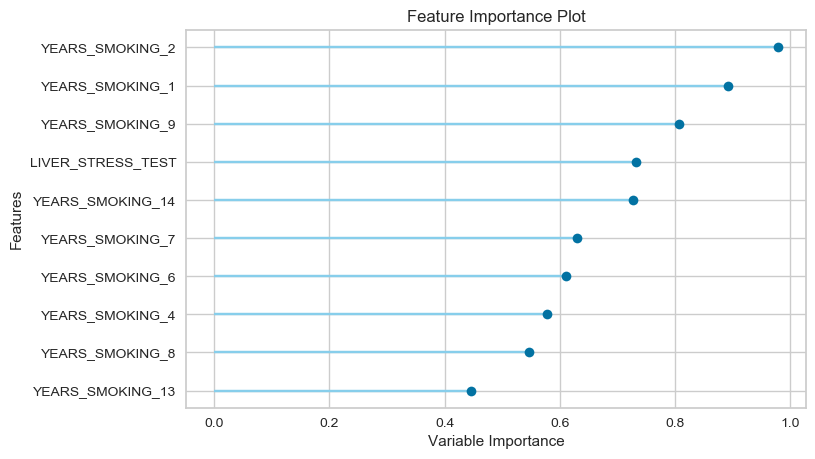

In [8]:
plot_model(Tuned_model, plot='feature')

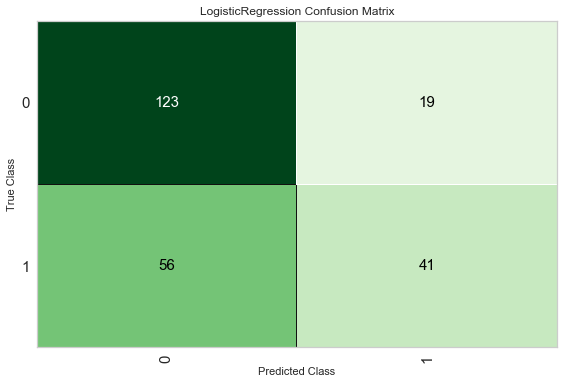

In [9]:
plot_model(Tuned_model, plot = 'confusion_matrix')

In [10]:
evaluate_model(Tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [11]:
predict_model(Tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6862,0.7584,0.4227,0.6833,0.5223,0.3075,0.3271


,AGE,WEIGHT,BMI,BLOOD_PRESSURE,INSULIN_TEST,LIVER_STRESS_TEST,CARDIO_STRESS_TEST,YEARS_SMOKING_0,YEARS_SMOKING_1,YEARS_SMOKING_10,...,YEARS_SMOKING_36,YEARS_SMOKING_4,YEARS_SMOKING_5,YEARS_SMOKING_6,YEARS_SMOKING_7,YEARS_SMOKING_8,YEARS_SMOKING_9,ZETA_DISEASE,Label,Score
0,25.0,194.0,41.299999,82.0,0.0,0.6698,70.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5368
1,39.0,156.0,31.200001,52.0,0.0,0.4428,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.6094
2,38.0,107.0,32.799999,80.0,0.0,0.1588,67.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9478
3,18.0,175.0,22.500000,96.0,0.0,0.3248,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8671
4,36.0,176.0,25.900000,74.0,75.0,0.2248,68.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,24.0,130.0,34.200001,82.0,70.0,1.3548,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9002
235,48.0,186.0,26.000000,74.0,135.0,0.7098,56.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.5527
236,49.0,147.0,35.599998,76.0,0.0,0.4408,57.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.8368
237,23.0,172.0,35.900002,76.0,200.0,0.5458,57.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8050


In [12]:
final_model = finalize_model(Tuned_model)
print(final_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [13]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7155,0.8048,0.4845,0.7231,0.5802,0.3775,0.3948


,AGE,WEIGHT,BMI,BLOOD_PRESSURE,INSULIN_TEST,LIVER_STRESS_TEST,CARDIO_STRESS_TEST,YEARS_SMOKING_0,YEARS_SMOKING_1,YEARS_SMOKING_10,...,YEARS_SMOKING_36,YEARS_SMOKING_4,YEARS_SMOKING_5,YEARS_SMOKING_6,YEARS_SMOKING_7,YEARS_SMOKING_8,YEARS_SMOKING_9,ZETA_DISEASE,Label,Score
0,25.0,194.0,41.299999,82.0,0.0,0.6698,70.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5118
1,39.0,156.0,31.200001,52.0,0.0,0.4428,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5203
2,38.0,107.0,32.799999,80.0,0.0,0.1588,67.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9026
3,18.0,175.0,22.500000,96.0,0.0,0.3248,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9028
4,36.0,176.0,25.900000,74.0,75.0,0.2248,68.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,24.0,130.0,34.200001,82.0,70.0,1.3548,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.8042
235,48.0,186.0,26.000000,74.0,135.0,0.7098,56.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.5109
236,49.0,147.0,35.599998,76.0,0.0,0.4408,57.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.7343
237,23.0,172.0,35.900002,76.0,200.0,0.5458,57.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7960


In [14]:
unseen_predictions = predict_model(final_model, data=Test_Data)
unseen_predictions.head()

,AGE,WEIGHT,BMI,BLOOD_PRESSURE,INSULIN_TEST,LIVER_STRESS_TEST,CARDIO_STRESS_TEST,YEARS_SMOKING,Label,Score
0,24,151,39.5,69,72,1.3968,56,4,0,0.6056
1,27,179,35.5,89,156,1.6608,43,6,1,0.5331
2,34,147,26.9,76,74,1.6958,53,2,0,0.8190
3,35,206,32.4,73,127,1.4608,61,6,1,0.7371
4,60,193,29.8,62,192,1.7798,65,9,1,0.9121


In [15]:
end  = datetime.now().minute
print("Total minutes taken {}".format(np.abs(start-end)))

Total minutes taken 2
